# New Section

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Alpha-Delta dataset.csv to Alpha-Delta dataset.csv


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

df= pd.read_csv("Alpha-Delta dataset.csv",usecols=['infection_Delta_Asia'])


In [ ]:
df1= pd.read_csv("Alpha-Delta dataset.csv",usecols=['infection_Delta_Asia'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1
df = df.dropna()

In [ ]:
plt.plot(df)

In [ ]:
#determining parameters
#d
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['infection_Delta_Asia'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.602533
p-value: 0.870409


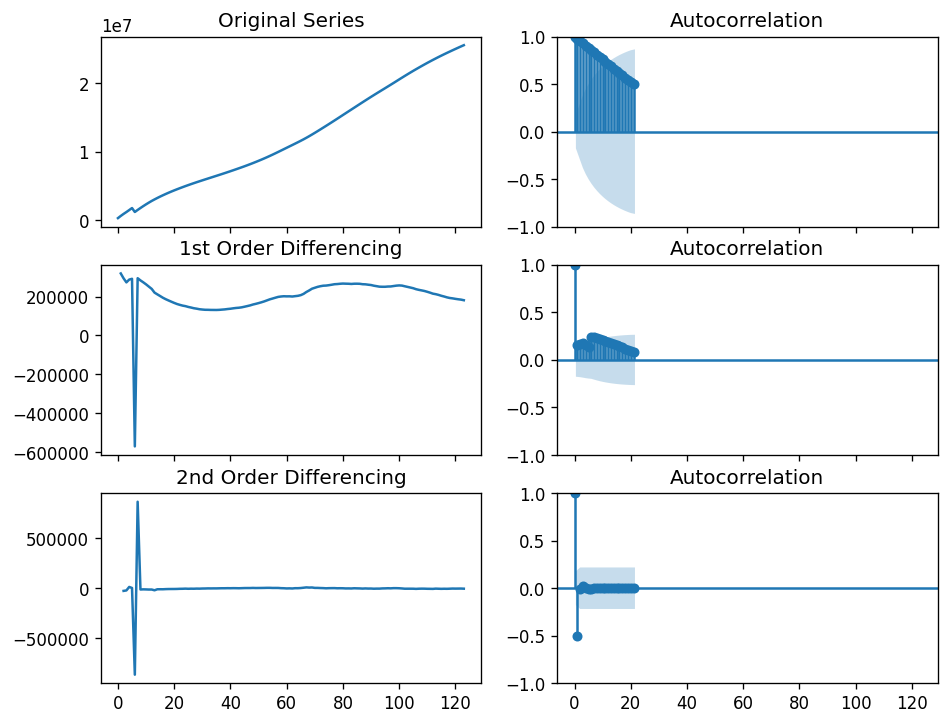

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['infection_Delta_Asia']); axes[0, 0].set_title('Original Series')
plot_acf(df['infection_Delta_Asia'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['infection_Delta_Asia'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['infection_Delta_Asia'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['infection_Delta_Asia'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['infection_Delta_Asia'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


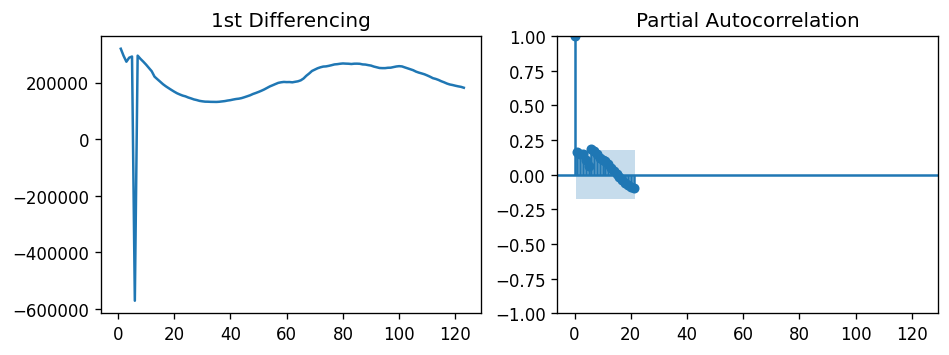

In [ ]:
#determining parameters
#p
# PACF plot of 1st or 2st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Delta_Asia'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['infection_Delta_Asia'].diff().dropna(), ax=axes[1])


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Delta_Asia'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['infection_Delta_Asia'].diff().diff().dropna(), ax=axes[1])
plt.show()


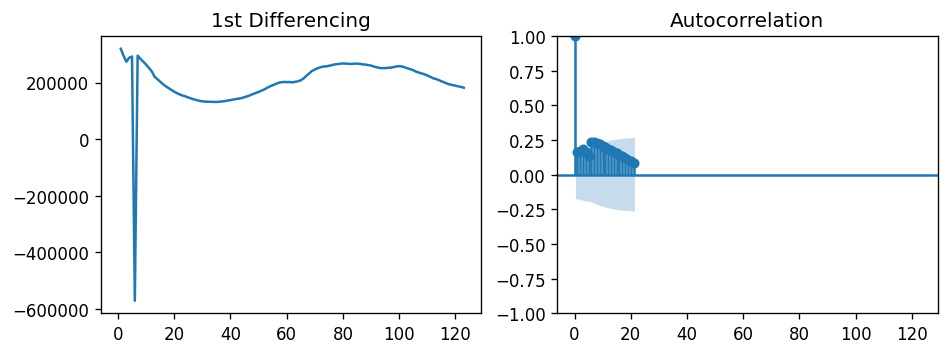

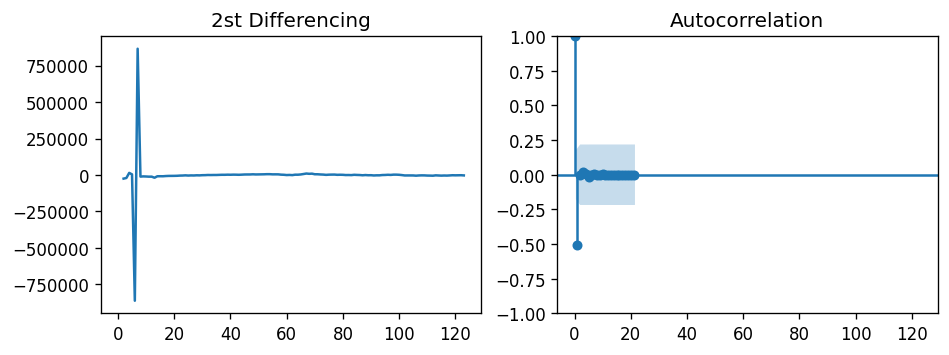

In [ ]:
#determining parameters
#q
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Delta_Asia'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['infection_Delta_Asia'].diff().dropna(), ax=axes[1])

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Delta_Asia'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['infection_Delta_Asia'].diff().diff().dropna(), ax=axes[1])
plt.show()




In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=7
# Create Training and Test
train = df['infection_Delta_Asia'][:len(df)-n_future]
test = df['infection_Delta_Asia'][len(df)-n_future:]

model = ARIMA(train, order=(3, 2, 2))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 7 days later", fontdict = font1)
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                SARIMAX Results                                 
Dep. Variable:     infection_Delta_Asia   No. Observations:                  117
Model:                   ARIMA(3, 2, 2)   Log Likelihood               -2849.871
Date:                  Fri, 14 Apr 2023   AIC                           5711.742
Time:                          18:23:40   BIC                           5728.212
Sample:                               0   HQIC                          5718.427
                                  - 117                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1634      0.011    101.400      0.000       1.141       1.186
ar.L2          0.0644      0.004     14.734      0.000       0.056       0.073
ar.L3         -0.2373      0.009    

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.0024019184565848397,
 'me': 60469.039767859234,
 'mae': 60469.039767859234,
 'mpe': 0.0024019184565848397,
 'rmse': 68020.2087690453}

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=14
# Create Training and Test
train = df['infection_Delta_Asia'][:len(df)-n_future]
test = df['infection_Delta_Asia'][len(df)-n_future:]

model = ARIMA(train, order=(2, 1, 4))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 14 days later", fontdict = font1)
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                SARIMAX Results                                 
Dep. Variable:     infection_Delta_Asia   No. Observations:                  110
Model:                   ARIMA(2, 1, 4)   Log Likelihood              -20796.894
Date:                  Fri, 14 Apr 2023   AIC                          41607.789
Time:                          18:28:23   BIC                          41626.628
Sample:                               0   HQIC                         41615.429
                                  - 110                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7173      0.001   1480.593      0.000       1.715       1.720
ar.L2         -0.7228      0.001   -621.580      0.000      -0.725      -0.721
ma.L1         -1.7238      0.001  -1

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.006218709489017515,
 'me': 149556.4027145907,
 'mae': 155056.2340269629,
 'mpe': 0.0059810236884671785,
 'rmse': 202606.30122075827}

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                SARIMAX Results                                 
Dep. Variable:     infection_Delta_Asia   No. Observations:                  103
Model:                   ARIMA(3, 1, 2)   Log Likelihood               -1335.449
Date:                  Fri, 14 Apr 2023   AIC                           2682.899
Time:                          18:31:12   BIC                           2698.649
Sample:                               0   HQIC                          2689.276
                                  - 103                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7247      0.119      6.106      0.000       0.492       0.957
ar.L2          0.9998      0.065     15.427      0.000       0.873       1.127
ar.L3         -0.7249      0.055    

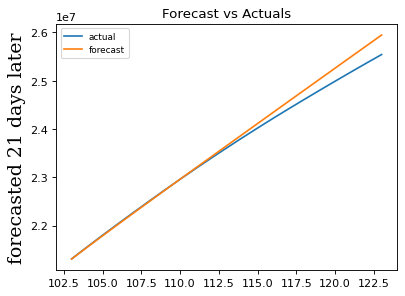

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=21
# Create Training and Test
train = df['infection_Delta_Asia'][:len(df)-n_future]
test = df['infection_Delta_Asia'][len(df)-n_future:]

model = ARIMA(train, order=(3, 1, 2))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 21 days later", fontdict = font1)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.004513412913750299,
 'me': 106231.67894827858,
 'mae': 112003.62883897836,
 'mpe': 0.004252160271848708,
 'rmse': 170142.69735310966}

In [ ]:
#########

In [ ]:
##deaths

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

df= pd.read_csv("Alpha-Delta dataset.csv",usecols=['death_Delta_Asia'])


In [ ]:
df1= pd.read_csv("Alpha-Delta dataset.csv",usecols=['death_Delta_Asia'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1
df = df.dropna()

In [ ]:
plt.plot(df)

In [ ]:
#determining parameters
#d
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['death_Delta_Asia'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.104554
p-value: 0.966371


In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['death_Delta_Asia']); axes[0, 0].set_title('Original Series')
plot_acf(df['death_Delta_Asia'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['death_Delta_Asia'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['death_Delta_Asia'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['death_Delta_Asia'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['death_Delta_Asia'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


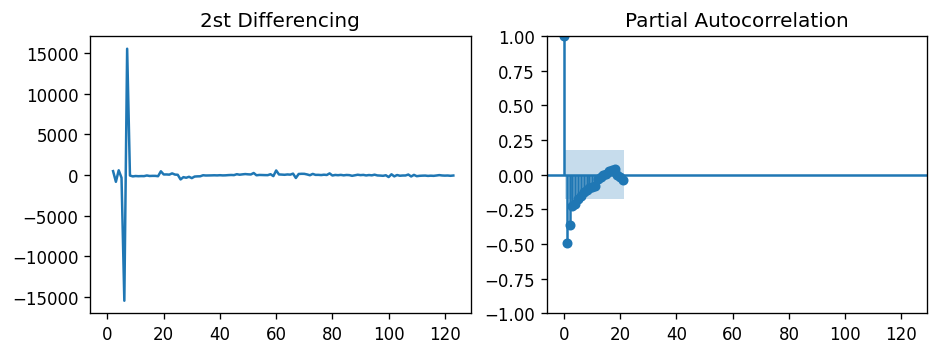

In [ ]:
#determining parameters
#p
# PACF plot of 1st or 2st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Delta_Asia'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['death_Delta_Asia'].diff().dropna(), ax=axes[1])


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Delta_Asia'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['death_Delta_Asia'].diff().diff().dropna(), ax=axes[1])
plt.show()

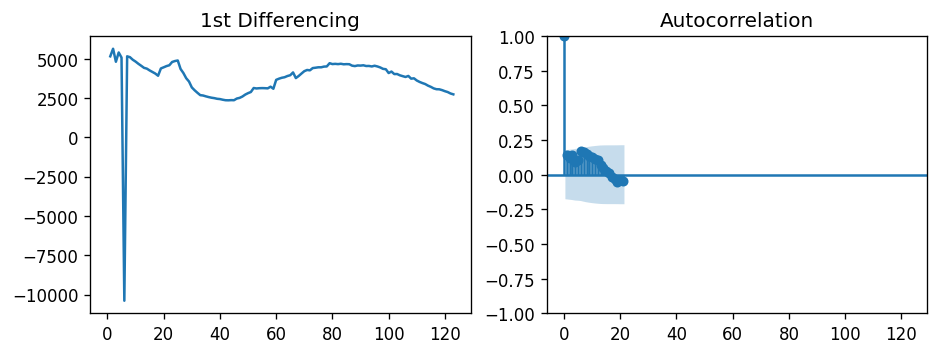

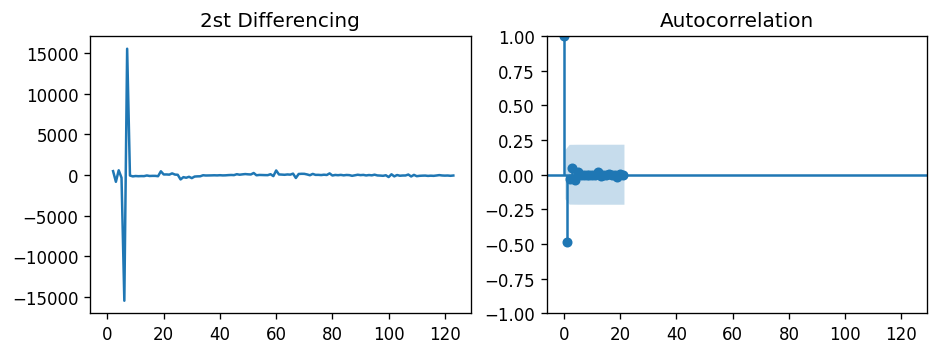

In [ ]:
#determining parameters
#q
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Delta_Asia'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['death_Delta_Asia'].diff().dropna(), ax=axes[1])

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Delta_Asia'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['death_Delta_Asia'].diff().diff().dropna(), ax=axes[1])
plt.show()

                               SARIMAX Results                                
Dep. Variable:       death_Delta_Asia   No. Observations:                  117
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -1024.748
Date:                Fri, 14 Apr 2023   AIC                           2057.495
Time:                        18:50:20   BIC                           2068.509
Sample:                             0   HQIC                          2061.966
                                - 117                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3261      0.063      5.208      0.000       0.203       0.449
ar.L2          0.2923      0.058      5.027      0.000       0.178       0.406
ar.L3          0.3302      0.062      5.357      0.0

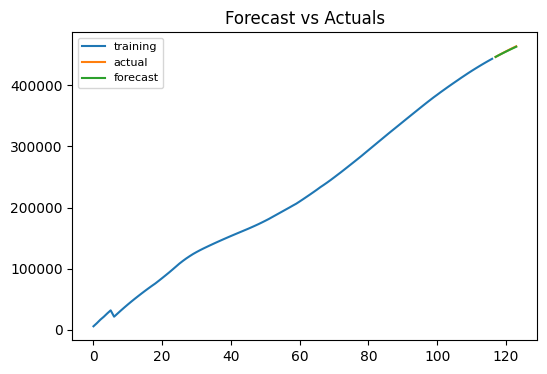

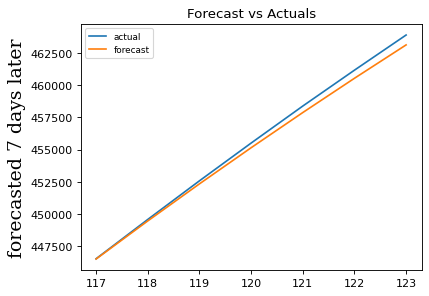

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=7
# Create Training and Test
train = df['death_Delta_Asia'][:len(df)-n_future]
test = df['death_Delta_Asia'][len(df)-n_future:]

model = ARIMA(train, order=(3, 1, 0))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 7 days later", fontdict = font1)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.0008213730466350597,
 'me': -377.19346321848985,
 'mae': 377.19346321848985,
 'mpe': -0.0008213730466350597,
 'rmse': 454.4410326508387}

                               SARIMAX Results                                
Dep. Variable:       death_Delta_Asia   No. Observations:                  110
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -966.315
Date:                Fri, 14 Apr 2023   AIC                           1940.631
Time:                        18:52:02   BIC                           1951.396
Sample:                             0   HQIC                          1944.997
                                - 110                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3263      0.068      4.832      0.000       0.194       0.459
ar.L2          0.2922      0.063      4.666      0.000       0.169       0.415
ar.L3          0.3297      0.066      4.967      0.0

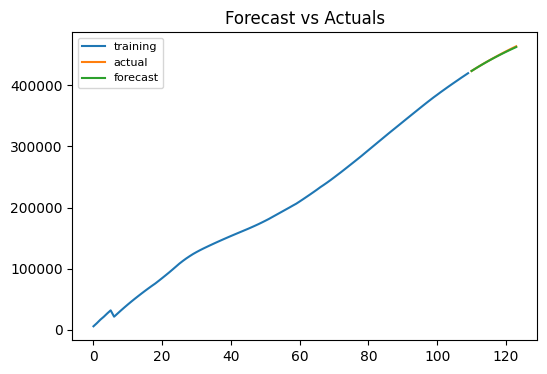

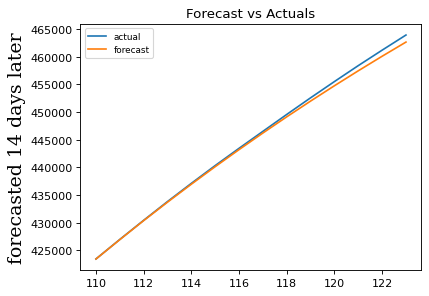

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=14
# Create Training and Test
train = df['death_Delta_Asia'][:len(df)-n_future]
test = df['death_Delta_Asia'][len(df)-n_future:]

model = ARIMA(train, order=(3, 1, 0))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 14 days later", fontdict = font1)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.0009694535941726609,
 'me': -441.26201192599336,
 'mae': 441.26201192599336,
 'mpe': -0.0009694535941726609,
 'rmse': 599.4234366024971}

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       death_Delta_Asia   No. Observations:                  103
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -1104.823
Date:                Fri, 14 Apr 2023   AIC                           2223.646
Time:                        18:55:38   BIC                           2241.952
Sample:                             0   HQIC                          2231.057
                                - 103                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1277      0.001    181.027      0.000       0.126       0.129
ar.L2          0.9999      0.025     39.522      0.000       0.950       1.049
ar.L3         -0.1278      0.006    -20.765      0.0

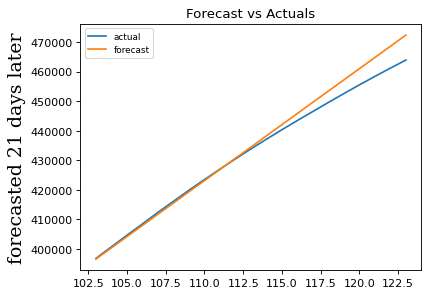

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=21
# Create Training and Test
train = df['death_Delta_Asia'][:len(df)-n_future]
test = df['death_Delta_Asia'][len(df)-n_future:]

model = ARIMA(train, order=(3, 2, 3))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 21 days later", fontdict = font1)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.00519593303784279,
 'me': 1986.695599445333,
 'mae': 2344.161992815298,
 'mpe': 0.004327969341712854,
 'rmse': 3489.513913790818}